# Presa dati e analisi preliminare, 24 marzo 2021

analisi dati preliminare esperienza 06__Kater

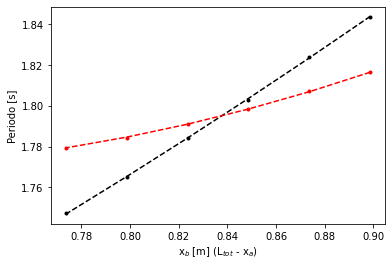

popt_1 [0] : 0.39 +- 0.19
popt_2 [0] : 0.86 +- 0.07

popt_1 [1] : 0.12 +- 0.32
popt_2 [1] : -1.14 +- 0.11

popt_1 [2] : 1.42 +- 0.14
popt_2 [2] : 2.15 +- 0.05



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import os

BASE_PATH = os.getcwd()
MISC_PATH = os.path.join(BASE_PATH, '../../misc')
TABLE_PATH = os.path.join(BASE_PATH, '../../relazione/tables')
DATA_PATH = os.path.join(BASE_PATH, '../../dati')

# misure con il calibro {cm} (+/- 0.05 mm)
L_0_1 = 10.415
L_0_2 = 14.930
d = 9.040

N_FORI = 25
FORO_P = 24
DIST_F = 2.5 # {cm} (senza errori)

def x_b(n_f):
    return (L_0_1+L_0_2+(d/2)+(N_FORI-n_f)*DIST_F)/100 # convertito in {m}

# misuriamo i valori per T1 (massa rossa in alto) e T2 (massa blu in alto)
# _T1_p<#posizione> = array di 10 misure di periodo per ogni posizione
# misure in {s}

_T1_p1 = np.array([1.8433475, 1.8438321, 1.8436974, 1.8441519, 1.8438134, 
                   1.8440039, 1.8434289, 1.8437870, 1.8432011, 1.8436028])
_T2_p1 = np.array([1.8162160, 1.8162461, 1.8164208, 1.8162922, 1.8165907,
                   1.8161985, 1.8163087, 1.8162481, 1.8167033, 1.8170554])

_T1_p2 = np.array([1.8241344, 1.8250191, 1.8243224, 1.8246017, 1.8238088,
                   1.8240085, 1.8238919, 1.8239454, 1.8243763, 1.8242312])
_T2_p2 = np.array([1.8069800, 1.8074008, 1.8066094, 1.8068046, 1.8073671,
                   1.8071854, 1.8080697, 1.8068933, 1.8072342, 1.8069937])

_T1_p3 = np.array([1.8010792, 1.8014794, 1.8021671, 1.8026592, 1.8024890,
                   1.8030486, 1.8031204, 1.8048308, 1.8040768, 1.8036150])
_T2_p3 = np.array([1.7978242, 1.7982385, 1.7983828, 1.7984080, 1.7984383, 
                   1.7986348, 1.7989685, 1.7985901, 1.7986484, 1.7986683])

_T1_p4 = np.array([1.7842967, 1.7831672, 1.7844837, 1.7838530, 1.7842300,
                   1.7839835, 1.7841418, 1.7838625, 1.7843554, 1.7840838])
_T2_p4 = np.array([1.7904099, 1.7919054, 1.7912305, 1.7911800, 1.7912973,
                   1.7911650, 1.7908471, 1.7912831, 1.7910748, 1.7911061])

_T1_p5 = np.array([1.7646188, 1.7654354, 1.7653484, 1.7646805, 1.7648372, 
                   1.7650848, 1.7649879, 1.7647196, 1.7644894, 1.7641298])
_T2_p5 = np.array([1.7837065, 1.7839124, 1.7838475, 1.7840367, 1.7837570,
                   1.7840481, 1.7845240, 1.7840374, 1.7848659, 1.7842935])

_T1_p6 = np.array([1.7469742, 1.7470051, 1.7474456, 1.7473891, 1.7476352,
                   1.7468288, 1.7475854, 1.7475552, 1.7489131, 1.7474017])
_T2_p6 = np.array([1.7793795, 1.7790879, 1.7794034, 1.7794454, 1.7793693,
                   1.7794584, 1.7793767, 1.7792549, 1.7794661, 1.7793790])


T1 = np.array([_T1_p1.mean(), _T1_p2.mean(), _T1_p3.mean(), _T1_p4.mean(), _T1_p5.mean(), _T1_p6.mean()])
err_T1 = np.array([_T1_p1.std(), _T1_p2.std(), _T1_p3.std(), _T1_p4.std(), _T1_p5.std(), _T1_p6.std()])/np.sqrt(10)
T2 = np.array([_T2_p1.mean(), _T2_p2.mean(), _T2_p3.mean(), _T2_p4.mean(), _T2_p5.mean(), _T2_p6.mean()])
err_T2 = np.array([_T2_p1.std(), _T2_p2.std(), _T2_p3.std(), _T2_p4.std(), _T2_p5.std(), _T2_p6.std()])/np.sqrt(10)
xb = np.array([x_b(n) for n in range(1, 7)])

def f(x, a, b, c):
    return a*(x**2)+b*x+c


plt.errorbar(xb, T1, yerr=err_T1, fmt='k.')
popt_1, pcov_1 = curve_fit(f, xb, T1, sigma=err_T1)
plt.plot(xb, f(xb, *popt_1), 'k--')
plt.errorbar(xb, T2, yerr=err_T2, fmt='r.')
popt_2, pcov_2 = curve_fit(f, xb, T2, sigma=err_T2)
plt.plot(xb, f(xb, *popt_2), 'r--')
plt.xlabel('x$_b$ [m] (L$_{tot}}$ - x$_a$) ')
plt.ylabel('Periodo [s]')
plt.show()

perr_1, perr_2 = np.sqrt(np.diag(pcov_1)), np.sqrt(np.diag(pcov_2))

for i in range(popt_1.size):
    print(f"popt_1 [{i}] : {popt_1[i]:.2f} +- {perr_1[i]:.2f}")
    print(f"popt_2 [{i}] : {popt_2[i]:.2f} +- {perr_2[i]:.2f}\n")

In [17]:
#lunghezza ridotta (mm)

l_r = 800.010
err_Lr = 0.010

Scrivere i dati su file `csv` per future analisi, scrivere tabelle

In [18]:
import csv

FILES = [
    'raw_T1_osc',
    'raw_T2_osc',
    'TABLE_RAW', #unused
    'computed_T1_x',
    'computed_T2_x',
]

with open(os.path.join(DATA_PATH, FILES[0] + '.csv'), 'w') as csv_file:
    w1 = csv.writer(csv_file, delimiter=',')
    w1.writerow(['p{}'.format(i) for i in range(1,7)])
    for j in range(10):
        w1.writerow([_T1_p1[j], _T1_p2[j], _T1_p3[j], _T1_p4[j], _T1_p5[j], _T1_p6[j]])

with open(os.path.join(DATA_PATH, FILES[1] + '.csv'), 'w') as csv_file:
    w2 = csv.writer(csv_file, delimiter=',')
    w2.writerow(['p{}'.format(i) for i in range(1,7)])
    for j in range(10):
        w2.writerow([_T2_p1[j], _T2_p2[j], _T2_p3[j], _T2_p4[j], _T2_p5[j], _T2_p6[j]])

# Salvo i dati nel formato 
# x, T, err_x, err_T
# in file csv per lettura in ROOT
        
with open(os.path.join(DATA_PATH, FILES[3] + '.txt'), 'w') as csv_T1_comp:
    w3 = csv.writer(csv_T1_comp, delimiter=' ')
    # w3.writerow(['x', 'T', 'x_err', 'T_err'])
    for j in range(6):
        w3.writerow([xb[j], T1[j], 0.000125/np.sqrt(3), err_T1[j]]) # cambiare il valore di errore su xb da 0 al valore stabilito (0.0001/np.sqrt(3))

with open(os.path.join(DATA_PATH, FILES[4] + '.txt'), 'w') as csv_T2_comp:
    w4 = csv.writer(csv_T2_comp, delimiter=' ')
    # w4.writerow(['x', 'T', 'x_err', 'T_err'])
    for j in range(6):
        w4.writerow([xb[j], T2[j], 0.000125/np.sqrt(3), err_T2[j]]) # cambiare il valore di errore su xb da 0 al valore stabilito